In [88]:
#Import necessary packages
import math
import numpy as np
np.set_printoptions(suppress=True,
                    formatter={'all': lambda x: '%5.3f' % x})
import pandas as pd
from scipy.optimize import brute, fmin, minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

#Install import_ipynb so we can read dependenies as jupyter notebooks
!pip install ipynb

#Import jupyer notebook depdendencies 
from ipynb.fs.full.FFT_option_valuation_LEWIS import BSM_call_value_FFT
from ipynb.fs.full.Lewis_Integration_option_valuation import BSM_call_value

In [14]:
#Import CSV file with option data as a panda dataframe
options = pd.read_csv('option_data.csv')
options

,Maturity,Strike,Call,Date,T,r
0,2021-01-08,85.0,13.500,2020-12-28,0.030137,-0.000491
1,2021-01-08,87.5,11.000,2020-12-28,0.030137,-0.000491
2,2021-01-08,90.0,8.500,2020-12-28,0.030137,-0.000491
3,2021-01-08,92.5,6.000,2020-12-28,0.030137,-0.000491
4,2021-01-08,95.0,3.900,2020-12-28,0.030137,-0.000491
5,2021-01-08,97.5,2.150,2020-12-28,0.030137,-0.000491
6,2021-01-08,100.0,0.900,2020-12-28,0.030137,-0.000491
7,2021-01-08,102.5,0.405,2020-12-28,0.030137,-0.000491
8,2021-01-08,105.0,0.405,2020-12-28,0.030137,-0.000491
9,2021-01-15,82.5,16.000,2020-12-28,0.049315,-0.000437


In [83]:
##################################################################################################################
################################################ Preliminaries ###################################################

#Define Stock price (Ericsson B, 28.12.2020)               
S0 = 98.36                    
#Dividend Yield

d = 0.0086  

#Slice the dataframe
#Default option selects all options in the csv file

##################################################################################################################
############### Solve for B&S implied volatility with stochastic interest rates using Newton-Rhapson #############

def implied(c, S, K, T, r, d, n):
#Initial guess: https://www.researchgate.net/publication/245065192_
#                       A_Simple_Formula_to_Compute_the_Implied_Standard_Deviation

    initial_guess = np.sqrt(2 * np.pi / T) * c / S
    implied_vol = initial_guess
    for i in range(1, n):
        d1 = (np.log(S / K) + (r - d + 0.5 * implied_vol**2) * T) / (implied_vol * np.sqrt(T))
        d2 = d1 - implied_vol * np.sqrt(T)
        c0 = S * np.exp(-d * T) * norm.cdf(d1) - K * np.exp(-r * T)*norm.cdf(d2)
        vega = S * np.exp(-d * T) * norm.pdf(d1) * np.sqrt(T)
        implied_vol = implied_vol - (c0 - c) / vega
        #Need to include a condition that ensures that implied volatility is positive#########################
    return implied_vol

#Run the function 'implied' with max 10000 iterations using our pandas columns 
options['impVol'] = implied(options['Call'].values, S0, options['Strike'].values, options['T'].values, options['r'].values, d, 10000) 

##################################################################################################################
######################### Calculation of B&S option values with stochastic interest rates ########################

def BSM_calculate_model_values_FFT():
    ''' Calculates all model prices given implied volatility. '''  
    values = []
    for row, option in options.iterrows():
        model_value = BSM_call_value_FFT(S0, option['Strike'], option['T'], option['r'], d, option['impVol'])
        values.append(model_value)
    return np.array(values) 

def BSM_calculate_model_values_INT():
    ''' Calculates all model prices given implied volatility. '''  
    values = []
    for row, option in options.iterrows():
        model_value = BSM_call_value(S0, option['Strike'], option['T'], option['r'], d, option['impVol'])
        values.append(model_value)
    return np.array(values) 
##################################################################################################################
################################################# Run calibration ################################################

if __name__ == '__main__': 
    
    #Create pandas column for BSM call options values based on calibrated data
    options['Model FFT'] = BSM_calculate_model_values_FFT()
    options['Model LEWIS'] = BSM_calculate_model_values_INT()

In [84]:
#Drop max.rows option so we can see full dataframe 
pd.set_option('display.max_rows', None)

#Drop all rows where NaN exists in the impVol column
options.dropna(subset=['impVol'], how='all', inplace=True)

#Only keep the rows with positive implied volatilities (can be taken care of in the implied vol calc. instead)
options = options[options['impVol'] >= 0]
options = options[abs(options['Call']-options['Model FFT'])<10]

# Compute relative error 
options['err FFT'] = abs(options['Call']-options['Model FFT'])/options['Call']
options['err LEWIS'] = abs(options['Call']-options['Model LEWIS'])/options['Call']

#Drop all rows which which have call options that are very deep out of the money (Strike < 66)
options = options[options['Strike'] >= 66 ]
options

,Maturity,Strike,Call,Date,T,r,impVol,Model FFT,Model LEWIS,err FFT,err LEWIS
0,2021-01-08,85.0,13.500,2020-12-28,0.030137,-0.000491,0.508845,13.500216,13.500000,0.000016,5.052748e-14
1,2021-01-08,87.5,11.000,2020-12-28,0.030137,-0.000491,0.425509,11.000219,11.000000,0.000020,6.201100e-14
2,2021-01-08,90.0,8.500,2020-12-28,0.030137,-0.000491,0.341989,8.500221,8.500000,0.000026,1.891883e-11
3,2021-01-08,92.5,6.000,2020-12-28,0.030137,-0.000491,0.257192,6.000224,6.000001,0.000037,1.008760e-07
4,2021-01-08,95.0,3.900,2020-12-28,0.030137,-0.000491,0.261689,3.900227,3.900000,0.000058,9.918865e-08
5,2021-01-08,97.5,2.150,2020-12-28,0.030137,-0.000491,0.250868,2.150230,2.150001,0.000107,3.198269e-07
6,2021-01-08,100.0,0.900,2020-12-28,0.030137,-0.000491,0.232546,0.900233,0.899999,0.000259,1.030005e-06
9,2021-01-15,82.5,16.000,2020-12-28,0.049315,-0.000437,0.471735,16.000213,16.000000,0.000013,4.352074e-14
10,2021-01-15,85.0,13.500,2020-12-28,0.049315,-0.000437,0.405287,13.500216,13.500000,0.000016,5.263280e-14
11,2021-01-15,87.5,11.000,2020-12-28,0.049315,-0.000437,0.339203,11.000219,11.000000,0.000020,6.588669e-14


In [85]:
maturities=list(set(options['T']))
maturities[4]

0.2219178082191781

In [86]:
plot = options[options['T']==maturities[4]]
plot

,Maturity,Strike,Call,Date,T,r,impVol,Model FFT,Model LEWIS,err FFT,err LEWIS
58,2021-03-19,70.0,28.500,2020-12-28,0.221918,-0.000032,0.429688,28.500198,28.500,0.000007,2.293682e-14
60,2021-03-19,80.0,19.000,2020-12-28,0.221918,-0.000032,0.359870,19.000210,19.000,0.000011,3.739699e-14
61,2021-03-19,85.0,14.875,2020-12-28,0.221918,-0.000032,0.360139,14.875215,14.875,0.000014,4.681223e-14
62,2021-03-19,87.5,12.875,2020-12-28,0.221918,-0.000032,0.351207,12.875218,12.875,0.000017,5.298027e-14
63,2021-03-19,90.0,10.750,2020-12-28,0.221918,-0.000032,0.326637,10.750221,10.750,0.000021,6.874088e-14
64,2021-03-19,92.5,9.000,2020-12-28,0.221918,-0.000032,0.319785,9.000224,9.000,0.000025,7.894919e-14
65,2021-03-19,95.0,7.450,2020-12-28,0.221918,-0.000032,0.315703,7.450227,7.450,0.000030,9.692471e-14
66,2021-03-19,97.5,6.000,2020-12-28,0.221918,-0.000032,0.307979,6.000230,6.000,0.000038,1.255292e-13
67,2021-03-19,100.0,4.750,2020-12-28,0.221918,-0.000032,0.301890,4.750233,4.750,0.000049,1.585632e-13
68,2021-03-19,102.5,3.725,2020-12-28,0.221918,-0.000032,0.298660,3.725236,3.725,0.000063,2.037446e-13


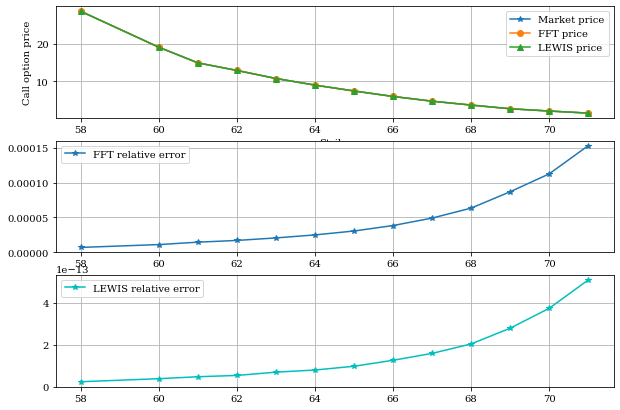

In [89]:
plt.figure(figsize=(10, 7))
plt.subplot(311) 
plt.plot(plot['Call'],'-*',label = 'Market price')
plt.plot(plot['Model FFT'],'-o',label = 'FFT price')
plt.plot(plot['Model LEWIS'],'-^',label = 'LEWIS price')
plt.xlabel('Strike')
plt.ylabel('Call option price')
plt.grid()
plt.legend()

plt.subplot(312)
plt.plot(plot['err FFT'],'-*',label = 'FFT relative error')
plt.legend()
plt.grid()


plt.subplot(313)
plt.plot(plot['err LEWIS'],'-*',color = 'c' ,label = 'LEWIS relative error')
plt.legend()
plt.grid()
plt.show()